In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [12]:
#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [13]:
#normalize pixel values to be between 0 to 1
x_train, x_test = x_train/255.0, x_test/255.0

In [15]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [17]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(50000, 10)

In [21]:
y_test.shape

(10000, 1)

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
y_test = to_categorical(y_test)

In [24]:
y_test.shape

(10000, 10)

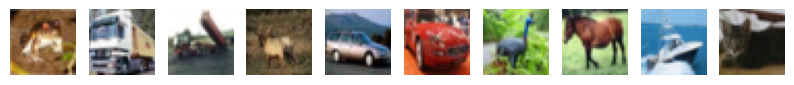

In [28]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [29]:
#build cnn model 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [33]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.2967 - loss: 1.8840 - val_accuracy: 0.5189 - val_loss: 1.3406
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5197 - loss: 1.3468 - val_accuracy: 0.5822 - val_loss: 1.1512
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5912 - loss: 1.1713 - val_accuracy: 0.6356 - val_loss: 1.0214
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.6387 - loss: 1.0478 - val_accuracy: 0.6587 - val_loss: 0.9719
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6654 - loss: 0.9589 - val_accuracy: 0.6863 - val_loss: 0.8928
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.6914 - loss: 0.8895 - val_accuracy: 0.6840 - val_loss: 0.8963
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7118 - loss: 0.8216 - val_accuracy: 0.7042 - val_loss: 0.8430
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7312 - loss: 0.7744 - 

In [35]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7322 - loss: 0.9893


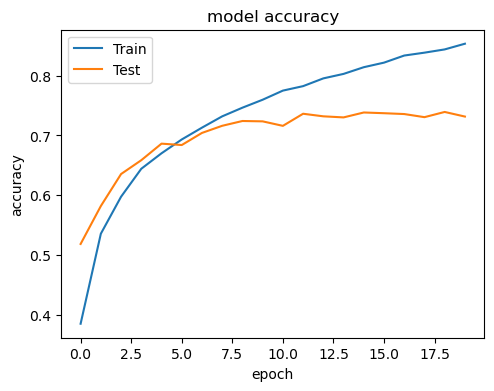

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc= 'upper left')
plt.show()

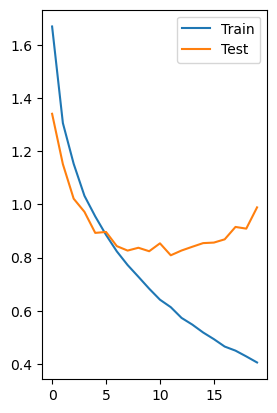

In [39]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.show()

In [40]:
#making pradiction
prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


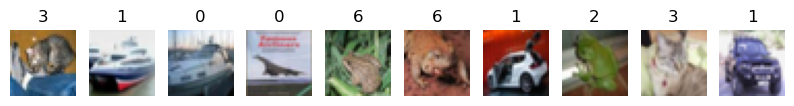

In [41]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(np.argmax(prediction[i]))
plt.show()

In [42]:
# saving the model
model.save('cnn_cifar10_model.h5')

In [43]:
#loading and using the saved model
from tensorflow.keras.models import load_model

saved_model = load_model('cnn_cifar10_model.h5')

saved_predict = saved_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
